In [102]:
import numpy as np
import csv
import pandas as pd
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


drive.mount('/content/drive')
datadir = "/content/drive/My Drive/cs441/finalproject/"

wine = "winequality-red.csv"
# "train_and_test2.csv"
df = pd.read_csv(datadir + wine)
target = df["quality"]


# df = pd.DataFrame(StandardScaler().fit_transform(df.drop(columns=["quality"])), columns=df.drop(columns=["quality"]).columns)

# train val test splits
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["quality"]), target, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

print(len(X_train), len(X_test), len(X_val))
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1023 320 256


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [103]:
from matplotlib import pyplot as plt

# function to display model performance with difference hyperparameter valeus
def plot_hyperselection(model_name, hyper_name, accuracy, values):
  plt.plot(values, accuracy)
  plt.title(model_name + " Hyperparameter Experiment")
  plt.ylabel("Accuracy")
  plt.xlabel(hyper_name)
  plt.show()

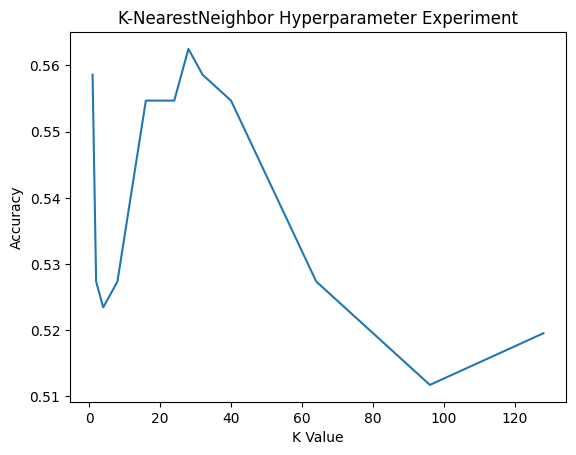

In [108]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import accuracy_score

# KNN Classifier
k = [1,2, 4, 8, 16, 24, 28, 32, 40, 64, 96, 128]
knn_acc = []
for i in k:
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  knn_pred = knn.predict(X_val)

  knn_acc.append(accuracy_score(y_val, knn_pred))

  # print(accuracy_score(y_val, knn_pred))
plot_hyperselection("K-NearestNeighbor","K Value", knn_acc, k)

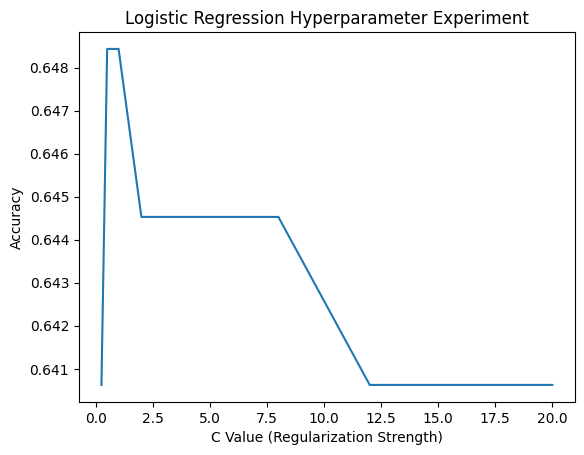

In [110]:
# Logisitic Regression Classifier
C = [0.25, 0.5,0.75, 1, 2, 4, 8, 12, 14, 16, 18, 20]
lr_acc = []
for i in C:
  LR_model = LogisticRegression(penalty="l2",  C=i, max_iter=15000)
  LR_model.fit(X_train, y_train)
  LR_y_pred = LR_model.predict(X_val)

  lr_acc.append(accuracy_score(y_val, LR_y_pred))

  # print(accuracy_score(y_val, LR_y_pred))
plot_hyperselection("Logistic Regression","C Value (Regularization Strength)", lr_acc, C)

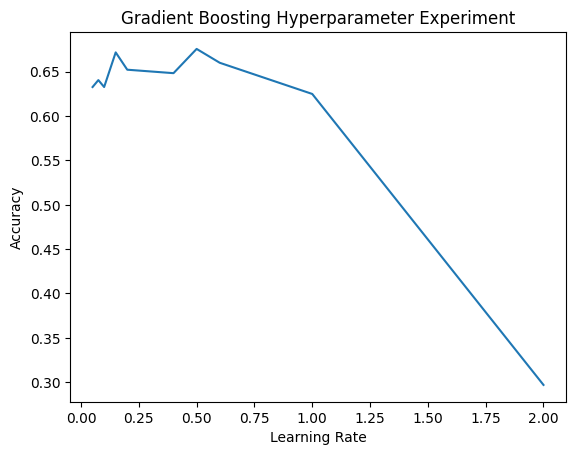

In [116]:
# Boosted Classifer
learning_rate = [0.05, 0.075, 0.1, 0.15, 0.2, 0.4, 0.5, 0.6, 1, 2]
grad_acc = []
for i in learning_rate:
  GB_model = GradientBoostingClassifier(learning_rate=i, random_state=0)
  GB_model.fit(X_train, y_train)
  gb_y_pred = GB_model.predict(X_val)

  grad_acc.append(accuracy_score(y_val, gb_y_pred))

  # print(accuracy_score(y_val, gb_y_pred))

plot_hyperselection("Gradient Boosting","Learning Rate", grad_acc, learning_rate)

In [117]:
# Test Evaluation with best hyperparameters

X_train_val = pd.concat([X_train, X_val], axis=0)
y_train_val = pd.concat([y_train, y_val], axis=0)

# NN
knn_test = KNeighborsClassifier(n_neighbors=28)
knn_test.fit(X_train_val, y_train_val)
knn_pred_test = knn_test.predict(X_test)

print("KNN", accuracy_score(y_test, knn_pred_test))


# LR

LR_test = LogisticRegression(penalty="l2",  C=0.75, max_iter=15000)
LR_test.fit(X_train_val, y_train_val)
LR_y_pred_test = LR_test.predict(X_test)

print("LR", accuracy_score(y_test, LR_y_pred_test))

# Boosted

GB_test = GradientBoostingClassifier(learning_rate=0.6, random_state=0)
GB_test.fit(X_train_val, y_train_val)
gb_y_pred_test = GB_test.predict(X_test)

print("GB", accuracy_score(y_test, gb_y_pred_test))


KNN 0.528125
LR 0.571875
GB 0.6625
